In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), 'data')

In [2]:
# Load the main dataset
full_data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "original", "card_transdata.csv")
df = pd.read_csv(full_data_path)
print("Dataset loaded.")

print(df.head())
print(df.info())


Dataset loaded.
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0 

In [3]:
print(f"Total number of samples: {len(df)}")

Total number of samples: 1000000


In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Check for missing values
print("\nMissing values in each column:")

print(df.isnull().sum())


Missing values in each column:
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


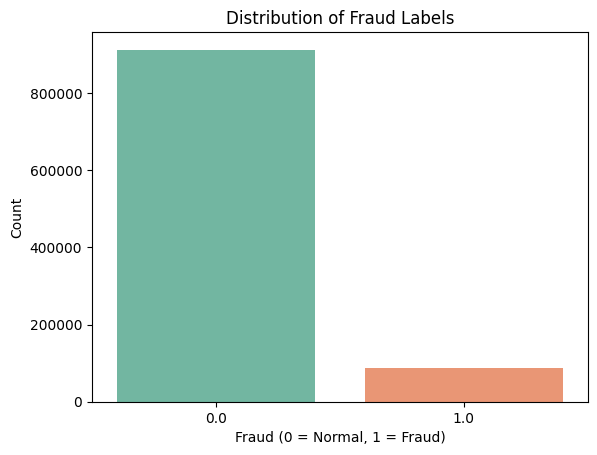

In [6]:
sns.countplot(data=df, x='fraud', hue='fraud', palette='Set2', legend=False)
plt.title("Distribution of Fraud Labels")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [7]:
# Split into stratified train and test sets
train_df, test_df = train_test_split(
    df,
    test_size=0.5,
    random_state=42,
    stratify=df["fraud"]
)

In [8]:
# Save the split datasets
save_splits = True 
output_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
if save_splits:
    train_path = os.path.join(output_dir, "training", "card_transdata_part1.csv")
    test_path = os.path.join(output_dir, "testing", "card_transdata_part2.csv")

    train_df.to_csv(train_path, index=False)
    test_df.to_csv(test_path, index=False)

    print("\nStratified split completed and files saved.")
    print(f"Train set path: {train_path}")
    print(f"Test set path:  {test_path}")


Stratified split completed and files saved.
Train set path: c:\Users\abudi\OneDrive\Documents\Uni Work\Capstone Project\fraud-detection-capstone\data\training\card_transdata_part1.csv
Test set path:  c:\Users\abudi\OneDrive\Documents\Uni Work\Capstone Project\fraud-detection-capstone\data\testing\card_transdata_part2.csv


In [9]:
# Display class distribution of the 'fraud' column
print("\n--- FRAUD Class Distribution ---")

print("\n[Train Set - Part 1]")
print(train_df["fraud"].value_counts(normalize=True))
print(train_df["fraud"].value_counts())

print("\n[Test Set - Part 2]")
print(test_df["fraud"].value_counts(normalize=True))
print(test_df["fraud"].value_counts())


--- FRAUD Class Distribution ---

[Train Set - Part 1]
fraud
0.0    0.912596
1.0    0.087404
Name: proportion, dtype: float64
fraud
0.0    456298
1.0     43702
Name: count, dtype: int64

[Test Set - Part 2]
fraud
0.0    0.912598
1.0    0.087402
Name: proportion, dtype: float64
fraud
0.0    456299
1.0     43701
Name: count, dtype: int64


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Separate features and target
X_train = train_df.drop(columns=['fraud'])
y_train = train_df['fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0.0: 456298, 1.0: 43702})
Class distribution after SMOTE: Counter({0.0: 456298, 1.0: 456298})


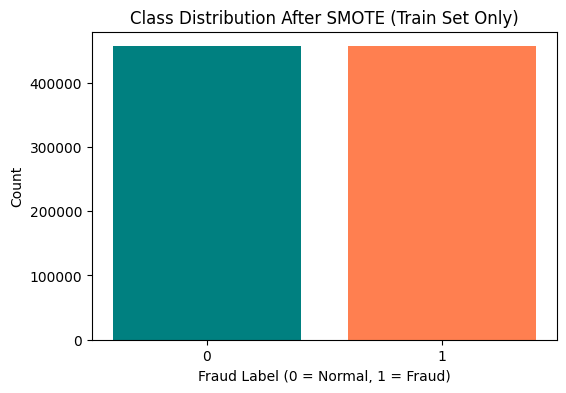

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

counter_res = Counter(y_resampled)

plt.figure(figsize=(6, 4))
plt.bar(counter_res.keys(), counter_res.values(), color=['teal', 'coral'])
plt.title('Class Distribution After SMOTE (Train Set Only)')
plt.xlabel('Fraud Label (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()


In [12]:
df_smote = pd.DataFrame(X_resampled, columns=X_train.columns)
df_smote['fraud'] = y_resampled

df_smote.to_csv("../data/training/train_data_smote.csv", index=False)

print(" SMOTE applied data was saved to the file 'train_data_smote.csv'.")
print(df_smote['fraud'].value_counts())


 SMOTE applied data was saved to the file 'train_data_smote.csv'.
fraud
0.0    456298
1.0    456298
Name: count, dtype: int64


In [13]:
full_data_path = "../data/training/train_data_smote.csv"
df = pd.read_csv(full_data_path)
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912596.000000,912596.000000,912596.000000,912596.000000,912596.000000,912596.000000,912596.000000,912596.0
mean,0.276363,0.120060,0.661775,-0.000996,-0.091016,-0.146868,0.280089,0.5
std,1.562936,1.352223,1.668151,1.001063,0.966615,0.767241,0.862601,0.5
min,-0.411272,-0.173725,-0.642476,-2.725359,-0.734980,-0.334684,-1.364948,0.0
25%,-0.346943,-0.162567,-0.400878,0.366924,-0.734980,-0.334684,0.732629,0.0
50%,-0.230446,-0.137796,0.061592,0.366924,-0.734980,-0.334684,0.732629,0.5
75%,0.168064,-0.044833,1.199416,0.366924,1.360581,-0.334684,0.732629,1.0
max,88.793791,407.976778,93.844571,0.366924,1.360581,2.987897,0.732629,1.0


In [14]:
print(f"Total number of samples: {len(df)}")


Total number of samples: 912596


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv("../data/training/train_data_smote.csv")
test_df = pd.read_csv("../data/testing/card_transdata_part2.csv")

# List of features to normalize
feature_columns = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit on train data and transform both train and test sets
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_df[feature_columns] = scaler.transform(test_df[feature_columns])

train_df.to_csv("../data/training/train_data_smote_normalized.csv", index=False)
test_df.to_csv("../data/testing/card_transdata_part2_normalized.csv", index=False)


In [16]:
import pandas as pd
full_data_path = "../data/testing/card_transdata_part2_normalized.csv"
df = pd.read_csv(full_data_path)
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.301707,0.012746,0.026080,1.166481,0.517783,0.130973,0.960788,0.087402
std,0.737438,0.054380,0.029258,0.104430,0.227620,0.090486,0.227334,0.282424
min,0.004665,0.000426,0.006846,0.881342,0.350732,0.100730,0.650726,0.000000
25%,0.048067,0.001151,0.011821,1.204728,0.350732,0.100730,0.650726,0.000000
50%,0.116227,0.002878,0.017356,1.204728,0.350732,0.100730,1.127467,0.000000
75%,0.291650,0.008671,0.028976,1.204728,0.827931,0.100730,1.127467,0.000000
max,119.198783,6.675104,1.786281,1.204728,0.827931,0.401701,1.127467,1.000000


In [17]:
import pandas as pd
full_data_path = "../data/training/train_data_smote_normalized.csv"
df = pd.read_csv(full_data_path)
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912596.000000,912596.000000,912596.000000,912596.000000,912596.000000,912596.000000,912596.000000,912596.0
mean,0.007708,0.000720,0.013803,0.881020,0.307299,0.056527,0.784256,0.5
std,0.017521,0.003313,0.017655,0.323729,0.461268,0.230917,0.411237,0.5
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000721,0.000027,0.002557,1.000000,0.000000,0.000000,1.000000,0.0
50%,0.002027,0.000088,0.007451,1.000000,0.000000,0.000000,1.000000,0.5
75%,0.006494,0.000316,0.019494,1.000000,1.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [18]:
import shutil

shutil.copyfile(
    os.path.join(DATA_DIR, "training", "train_data_smote_normalized.csv"),
    os.path.join(DATA_DIR, "training", "train_normal_1.csv")
)
shutil.copyfile(
    os.path.join(DATA_DIR, "testing", "card_transdata_part2_normalized.csv"),
    os.path.join(DATA_DIR, "testing", "test_normal_1.csv")
)

'c:\\Users\\abudi\\OneDrive\\Documents\\Uni Work\\Capstone Project\\fraud-detection-capstone\\data\\testing\\test_normal_1.csv'

In [19]:
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("../data/training/train_data_smote.csv")
test_df = pd.read_csv("../data/testing/card_transdata_part2.csv")

# List of features to normalize
feature_columns = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit on train data and transform both train and test sets
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_df[feature_columns] = scaler.transform(test_df[feature_columns])

train_df.to_csv("../data/training/train_normal_2.csv", index=False)
test_df.to_csv("../data/testing/test_normal_2.csv", index=False)

In [ ]:
from sklearn.preprocessing import RobustScaler

train_df = pd.read_csv("../data/training/train_data_smote.csv")
test_df = pd.read_csv("../data/testing/card_transdata_part2.csv")

# List of features to normalize
feature_columns = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Initialize the scaler
scaler = RobustScaler()

# Fit on train data and transform both train and test sets
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_df[feature_columns] = scaler.transform(test_df[feature_columns])

train_df.to_csv("../data/training/train_normal_3.csv", index=False)
test_df.to_csv("../data/testing/test_normal_3.csv", index=False)

In [ ]:
SAMPLE_SIZE = 5000

def sample_df(df):
    return df.sample(n=min(SAMPLE_SIZE, len(df)), random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.stats import skew, kurtosis

def compare_normalizations(original_df, norm_dfs, norm_names):
    results = []

    def compute_metrics(df, name):
        desc = df.describe().T
        desc['skew'] = df.apply(skew)
        desc['kurtosis'] = df.apply(kurtosis)
        desc['normalization'] = name
        results.append(desc)

        # Plot boxplots
        df.boxplot(figsize=(10, 5))
        plt.title(f'Boxplot for {name}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        # Plot histograms (first few features for brevity)
        df.iloc[:, :5].hist(figsize=(15, 8), bins=30)
        plt.suptitle(f'Histograms for {name}')
        plt.show()

        # PCA scatter plot
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(df)
        plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5)
        plt.title(f'PCA Scatter plot for {name}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()

        # Pairwise distance stats
        dists = pairwise_distances(df)
        print(f"{name} - Mean pairwise distance: {dists.mean():.4f}, Std: {dists.std():.4f}")

    # Compute metrics for the original data
    compute_metrics(original_df, 'Original')

    # Compute metrics for each normalization
    for norm_df, norm_name in zip(norm_dfs, norm_names):
        compute_metrics(norm_df, norm_name)

    # Combine and display metrics
    summary = pd.concat(results)
    print(summary)

    return summary

# Use sample_df() to sample each dataframe for faster visualization
train_original_df = sample_df(pd.read_csv("../data/training/train_data_smote.csv"))
train_norm1_df = sample_df(pd.read_csv("../data/training/train_normal_1.csv"))
train_norm2_df = sample_df(pd.read_csv("../data/training/train_normal_2.csv"))
train_norm3_df = sample_df(pd.read_csv("../data/training/train_normal_3.csv"))

test_original_df = sample_df(pd.read_csv("../data/testing/card_transdata_part2.csv"))
test_norm1_df = sample_df(pd.read_csv("../data/testing/test_normal_1.csv"))
test_norm2_df = sample_df(pd.read_csv("../data/testing/test_normal_2.csv"))
test_norm3_df = sample_df(pd.read_csv("../data/testing/test_normal_3.csv"))

# Drop 'fraud' column from all dataframes before comparison
train_original_df = train_original_df.drop(columns=['fraud'])
train_norm1_df = train_norm1_df.drop(columns=['fraud'])
train_norm2_df = train_norm2_df.drop(columns=['fraud'])
train_norm3_df = train_norm3_df.drop(columns=['fraud'])

test_original_df = test_original_df.drop(columns=['fraud'])
test_norm1_df = test_norm1_df.drop(columns=['fraud'])
test_norm2_df = test_norm2_df.drop(columns=['fraud'])
test_norm3_df = test_norm3_df.drop(columns=['fraud'])

# Compare normalizations on training data
print("Comparing normalizations on training data...")
train_results = compare_normalizations(
    train_original_df,
    [train_norm1_df, train_norm2_df, train_norm3_df],
    ['MinMax', 'Standard', 'Robust']
)

# Compare normalizations on testing data
print("Comparing normalizations on testing data...")
test_results = compare_normalizations(
    test_original_df,
    [test_norm1_df, test_norm2_df, test_norm3_df],
    ['MinMax', 'Standard', 'Robust']
)